In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

/home/neutralius/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [53]:
df = pd.read_csv("Notaufnahmesurveillance_Zeitreihen_Syndrome.tsv", sep="\t")
df['date'] = pd.to_datetime(df['date'])
df['jahr'] = df['date'].dt.year
df['monat'] = df['date'].dt.month
df['tag'] = df['date'].dt.day
df.head()

,date,ed_type,age_group,syndrome,relative_cases,relative_cases_7day_ma,expected_value,expected_lowerbound,expected_upperbound,ed_count,jahr,monat,tag
0,2019-01-01,all,0-4,ARI,28.814,NaN,23.594950,19.609644,27.818732,8,2019,1,1
1,2019-01-02,all,0-4,ARI,27.273,NaN,23.580625,19.596581,27.803142,10,2019,1,2
2,2019-01-03,all,0-4,ARI,26.786,NaN,23.563811,19.581250,27.784845,10,2019,1,3
3,2019-01-04,all,0-4,ARI,24.444,NaN,23.544520,19.563658,27.763852,8,2019,1,4
4,2019-01-05,all,0-4,ARI,16.667,NaN,23.522763,19.543819,27.740174,10,2019,1,5


In [59]:
#df_aggregated = df.groupby(['monat', 'tag'])['ed_count'].sum()
#df_aggregated[:500]

In [36]:
#df["date_numeric"].value_counts()
#df["date"].value_counts()
df.head()

,date,ed_type,ed_count,date_numeric,ed_sum
0,2019-01-01,all,8,737060,NaN
1,2019-01-02,all,10,737061,NaN
2,2019-01-03,all,10,737062,NaN
3,2019-01-04,all,8,737063,NaN
4,2019-01-05,all,10,737064,NaN


(221115, 2)
(221115,)
monat    0
tag      0
dtype: int64
0
Mean Squared Error: 57.32007202623345
Mean Absolute Error: 6.047263342669791


ValueError: x and y must be the same size

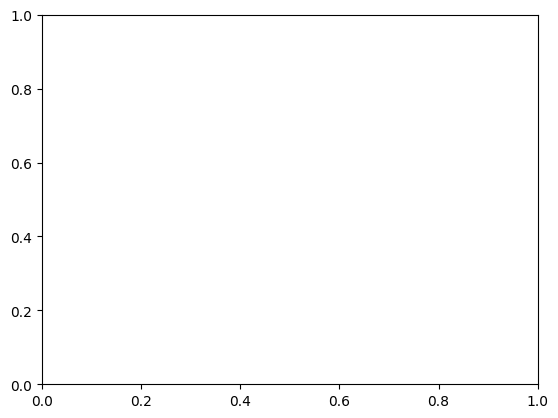

In [63]:
X = df[['monat', 'tag']]
y = df['ed_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell erstellen
model = LinearRegression()

# Modell trainieren
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Metriken berechnen
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(X.shape)
print(y.shape)
print(X.isnull().sum())  # Anzahl der NaN-Werte in X
print(y.isnull().sum())  # Anzahl der NaN-Werte in y
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")